# Advanced Tree Methods

*Author:Eda AYDIN*

Table of Contents
- [Random Forests](#random-forests)
- [Gradient Boosting Machines (GBM)](#gradient-boosting-machines-gbm)
- [Extreme Gradient Boosting(XGBoost)](#extreme-gradient-boosting-xgboost)
- [LightGBM](#lightgbm)
- [CatBoost](#catboost)
- [Feature Importance](#feature-importance)
- [RandomSearchCV](#randomsearchcv)
- [Examining Model Complexity with Learning Curves](#examining-model-complexity-with-learning-curves)

## Random Forests

- Temeli birden çok karar ağacın ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
- Birden fazla ağacın bir araya gelerek tahminler yaptığı durumdur.
- Bagging (Breiman, 1996) ile Random Subspace (Ho, 1998) yöntemlerinin birleşimi ile oluşmuştur.
- Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile **değişkenlerin random subspace yöntemi ile seçilir.** Rastgelelik buradan gelir. Gözlem birimlerinden rastgele seçerek n tane ağaç oluşturur. Diğeri de bölme işlemine başlamadan önce rastgele daha aza sayı da değişken seçer. Böylece genellenebilirliğini de korur.
- Karar ağacının her bir düğümünde en iyi dallara ayırıcı(bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.
- Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirilmesi ve değişken öneminin belirlenmesi için kullanılır. Kendi doğrulamasını kendi yapar.
- Her düğüm noktasında rastgele değişken seçimi yapılır. (Regresyon'da p/3, sınıflandırma'da karekök p) Rastgelelikten dolayı metrikler ya da değişkenler birbirini ezmez.
- Her bir ağaçtan bir tahmin sonucu elde edilir.

*Neden Rastgele?*
- CART içerisinde aşırı öğrenmeye meyilli olduğundan dolayı, rassallığın korunması için gelişmiş ağaç yöntemlerine ihtiyacımız var.

**Bagging**

![Bagging](bagging1.png)

- Örnek olarak 1000 gözlem içinden rastgele 750 gözlemi seçer ve bu 750 gözlemle ağaç oluşturulur. Sonra bu 750 gözlem yerine konulur ve yeniden 100 gözlem içinden yine rastgele 750 gözlem çekilir ve başka bir ağaç oluşturulur. Bu böyle m'e kadar gider. Buradaki ağaçların kurulan bir önceki ağaçla herhangi bir bağımlılığı yoktur. Ezberlemeye karşı bu yüzden dayanıklıdır. 

**Boosting**

- Ağaçlar artıkları üzerine kurulur. Bu yüzden ağaçların birbirleri ile bağlılıkları vardır. (***Bu özellik Bagging ve Boosting ifadelerin en büyük ayrım noktasıdır.***)

**Random Subspace**
- Mesela 100 değişen var. Rastgele 20 tanesini seçiyor ve zaten belirlenen gözlemler üzerinden bu değişkenler ile ilk ağaç için kırılımları yapmaya başlıyor. Sonra diğer ağaç için rastgele yine 20 tane değişken seçilip bunlara göre kırımlar başlıyor.


----- 

## Random Forests

- It is based on the evaluation of the predictions produced by more than one decision tree.
- It is a situation where more than one tree comes together and makes predictions.
- It is formed by the combination of Bagging (Breiman, 1996) and Random Subspace (Ho, 1998) methods.
- Observations for trees are selected by bootstrap random sample selection method **variables random subspace method.** This is where randomness comes from. It creates n trees by randomly choosing from the observation units. The other randomly chooses fewer variables before starting the division operation. Thus, it maintains its generalizability.
- At each node of the decision tree, the best branching (information gain) variable is chosen from a small number of randomly selected variables among all variables.
- 2/3 of the data set is used in tree creation. Excluded data is used to evaluate the performance of trees and to determine variable significance. It does its own validation.
- Random variable selection is made at each node. (p/3 in regression, square root p in classification) Because of randomness, metrics or variables do not overwhelm each other.
- A prediction result is obtained from each tree.

*Why Random?*
- Because CART is prone to over-learning, we need advanced tree methods to preserve randomness.

**Bagging**

- For example, it randomly selects 750 observations out of 1000 observations and a tree is created with these 750 observations. Then these 750 observations are placed in place and 750 observations are drawn randomly from 100 observations again and another tree is formed. This goes up to m. The trees here do not have any dependencies with the previous tree established. It is therefore resistant to memorization.

**Boosting**

- Trees are built on their scraps. That's why trees have interdependencies. (***This feature is the biggest difference between Bagging and Boosting expressions.***)

**Random Subspace**
- For example, there are 100 variables. It randomly selects 20 of them and starts to make breakdowns for the first tree with these variables based on the already determined observations. Then, 20 variables are randomly selected for the other tree and decimation begins according to them.

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV,cross_validate, RandomizedSearchCV, validation_curve

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

c:\Users\choon\anaconda3\envs\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\choon\anaconda3\envs\python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\choon\anaconda3\envs\python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\choon\anaconda3\envs\python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [3]:
warnings.simplefilter(action="ignore",category=Warning)

In [4]:
df = pd.read_csv("datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [6]:
rf_model = RandomForestClassifier(random_state=17)
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [7]:
cv_results = cross_validate(estimator=rf_model,
                            X=X,
                            y=y,
                            cv=10,
                            scoring=["accuracy","f1","roc_auc"])

In [8]:
cv_results["test_accuracy"].mean()

0.753896103896104

In [9]:
cv_results["test_f1"].mean()

0.6190701534636385

In [10]:
cv_results["test_roc_auc"].mean()

0.8233960113960114

In [11]:
rf_params = {"max_depth": [5,8,None], # The maximum depth of the tree. 
             "max_features":[3,5,6,"auto"], # The number of features to consider when looking for the best split
             "min_samples_split":[2,5,8,15,20], # The minimum number of samples required to split an internal node
             "n_estimators":[100,200,500]} # The number of trees in the forest.

In [12]:
rf_best_grid = GridSearchCV(estimator=rf_model,
                            param_grid=rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [13]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 8,
 'n_estimators': 500}

In [14]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_,random_state=17).fit(X,y)

In [15]:
cv_results= cross_validate(estimator=rf_final,
                           X=X,
                           y=y,
                           cv=10,
                           scoring=["accuracy","f1","roc_auc"])

In [16]:
cv_results["test_accuracy"].mean()

0.766848940533151

In [17]:
cv_results['test_f1'].mean()

0.6447777811143756

In [18]:
cv_results['test_roc_auc'].mean()

0.8271054131054132

In [19]:
def plot_importance(model, features, num = len(X), save = False):
    feature_imp = pd.DataFrame({"Value":model.feature_importances_,
                                "Feature":features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value",y = "Feature", data = feature_imp.sort_values(by="Value",
                                                                        ascending = False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    if save :
        plt.savefig("Feature Importance for {}.png".format(type(model).__name__))
    plt.show()

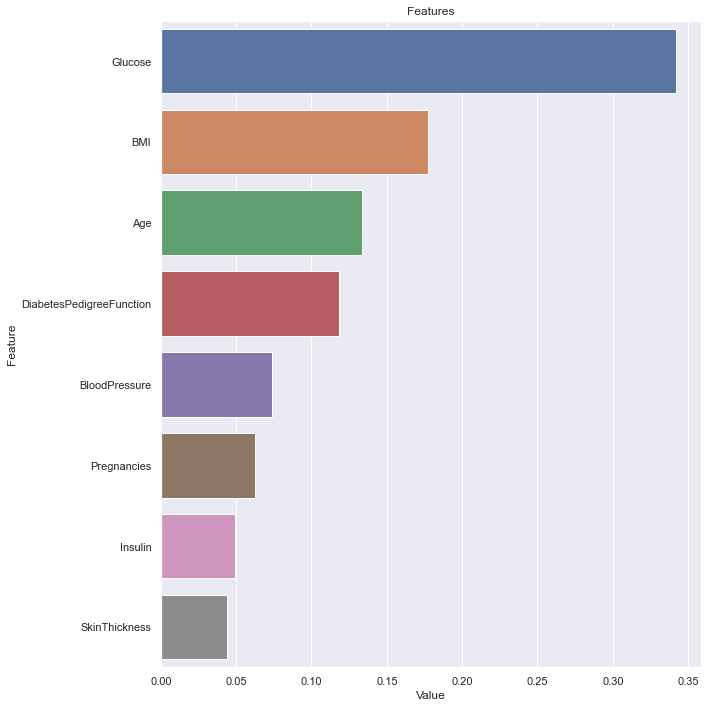

In [20]:
plot_importance(model=rf_final,
                features=X,
                save=True)

In [21]:
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(model, X=X, y=y, 
                                               param_name=param_name, 
                                               param_range=param_range, 
                                               scoring=scoring, 
                                               cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.savefig("{} - {} Graph for {}.png".format(param_name, scoring, type(model).__name__))
    plt.show(block=True)

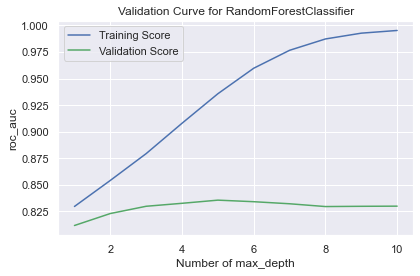

In [22]:
val_curve_params(rf_final, X, y, "max_depth", range(1, 11), scoring="roc_auc")

## Gradient Boosting Machines (GBM)

- Bu ifade Gradient Boosted Trees olarak da karşımıza gelebilir.
- Artık optimizasyona dayalı çalışan bir ağaç yöntemidir. Ağaç yöntemlerine gradient ve boosting ifadelerinin uygulanmasıdır.
- GBM temelleri Adaboost'a dayalıdır.

**AdaBoost (Adaptive Boosting)**
- Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturma fikrine dayanır.

![Adaboost](adaboost.png)

- Kutu içerisinde kalan + ve - sınıflandırmalardaki ağırlıklara bakıldığında, en uygun sınıflandırıcı belirlenir. 
- Tüm sınıflandırıcılar belli ağırlıklar kullanarak farklı noktalardaki sınıflandırmanın doğru yapılması sağlarlar.

**Gradient Boosting Machines(GBM)**
- Hatalar / artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.
- Bundan sonra işlenecek tüm ağaç modelleri, GBM'in temeli üzerine kuruludur.
- Boosting yöntemlerin gradient descent ile optimize edilmesi işidir.
- Boosting + Gradient Descent
- Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.
- Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının / hatalarının (residuals) üzerine kurularak (fit) oluşturulur.
- GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmaktadır.
- Tek bir tahminsel model formunda olan modeller serisi additive şeklinde kurulur.

-----

## Gradient Boosting Machines (GBM)

- This expression can also appear as Gradient Boosted Trees.
- It is now a working tree method based on optimization. It is the application of gradient and boosting expressions to tree methods.
- GBM fundamentals are based on Adaboost.

**AdaBoost (Adaptive Boosting)**
- It is based on the idea that weak classifiers come together to form a strong classifier.
- Considering the weights in the + and - classifications in the box, the most appropriate classifier is determined.
- All classifiers use certain weights to ensure correct classification at different points.

**Gradient Boosting Machines(GBM)**
- A series of models in the form of a single predictive model are built on errors / residuals.
- All tree models to be processed from now on are built on the foundation of GBM.
- It is the job of optimizing the boosting methods with gradient descent.
- Boosting + Gradient Descent
- Gradient boosting creates a series of models that are in the form of a single predictive model.
- A model in the series is created (fit) on the prediction residuals / errors (residuals) of the previous model in the series.
- GBM uses Gradient descent algorithm, which can optimize any differentiable loss function.
- The series of models, which are in the form of a single predictive model, are set up as additive.

**Additive Modelling**

$$\begin{align*}
 \hat{y}&=f_0(x) + \Delta_1(x) + \Delta_2(x)+ \cdots + \Delta_M(x) \\ 
 &= f_0(x) + \sum_{m=1}^{M}\Delta_m(x) \\ 
 &= F_M(x)
\end{align*}$$

- $f_0(x)$ : First Model (CART üzerinden gelen ilk veriler)
- $\Delta_1(x), \Delta_2(x), \cdots , \Delta_M(x)$ : Artıklar üzerine kurulan modellerin çıktıları
- $M$ : iterasyon sayısı


$$\begin{align*}
F_0(x) &= f_0(x) \\
F_m(x) &= F_{m-1}(x) + \Delta_m(x) 
\end{align*}$$

- $F_0(X)$ : base model
- $F_m(X)$ : artık modeller

**Neden additive model?**
- Artıklar üzerine kurulan modeller de gradient descent ile eklemeler yaparak ilerleyip, kırımları belirlediğimiz için GBM additive model kullanır.

In [23]:
gbm_model = GradientBoostingClassifier(random_state=17)

In [24]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 17,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [25]:
cv_results = cross_validate(estimator = gbm_model,
                            X=X,
                            y=y,
                            cv=5,
                            scoring = ["accuracy","f1","roc_auc"])

In [26]:
cv_results['test_accuracy'].mean()

0.7591715474068416

In [27]:
cv_results['test_accuracy'].mean()

0.7591715474068416

In [28]:
cv_results['test_roc_auc'].mean()

0.8254867225716283

In [29]:
cv_results['test_roc_auc'].mean()

0.8254867225716283

In [30]:
gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8, 10],
              "n_estimators": [100, 500, 1000], # number of optimization
              "subsample": [1, 0.5, 0.7]}

In [31]:
gbm_best_grid = GridSearchCV(estimator=gbm_model, 
                             param_grid=gbm_params, 
                             cv=5,
                             n_jobs=-1, 
                             verbose=True).fit(X, y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [32]:
gbm_best_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}

In [33]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_,
                                 random_state=17).fit(X,y)

In [34]:
cv_results = cross_validate(estimator = gbm_final,
                            X=X,
                            y=y,
                            cv=5,
                            scoring = ["accuracy","f1","roc_auc"])

In [35]:
cv_results['test_accuracy'].mean()

0.7800186741363212

In [36]:
cv_results['test_f1'].mean()

0.668605747317776

In [37]:
cv_results['test_roc_auc'].mean()

0.8257784765897973

## Extreme Gradient Boosting (XGBoost)

- XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir versiyonudur.

In [38]:
xgboost_model = XGBClassifier(random_state=17,
                              user_label_encoder=False)

In [39]:
xgboost_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 17,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'user_label_encoder': False}

In [40]:
cv_results = cross_validate(estimator= xgboost_model,
                            X=X,
                            y=y,
                            cv=5,
                            scoring = ["accuracy","f1","roc_auc"])

[19:02:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "user_label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:02:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "user_label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being m

In [41]:
cv_results["test_accuracy"].mean()

0.7526525761819879

In [42]:
cv_results["test_f1"].mean()

0.6317893713482235

In [43]:
cv_results["test_roc_auc"].mean()

0.7987134870719776

In [44]:
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.7, 1]}

In [45]:
xgboost_best_grid = GridSearchCV(estimator=xgboost_model, 
                             param_grid=xgboost_params, 
                             cv=5,
                             n_jobs=-1, 
                             verbose=True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[19:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "user_label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [46]:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_, random_state=17).fit(X,y)

[19:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "user_label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
cv_results = cross_validate(estimator= xgboost_final,
                            X=X,
                            y=y,
                            cv=5,
                            scoring = ["accuracy","f1","roc_auc"])

[19:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "user_label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "user_label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being m

In [48]:
cv_results['test_accuracy'].mean()

0.7578643578643579

In [49]:
cv_results['test_f1'].mean()

0.6297649135382188

In [50]:
cv_results['test_roc_auc'].mean()

0.8145597484276731

## LightGBM

- LightGBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.
- Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi ile daha hızlıdır.
- XGBoost geniş kapsamlı bir ilk arama yaparken, LightGBM derinlemesine ilk arama yapmaktadır.

In [51]:
lgbm_model = LGBMClassifier(random_state=17)

In [52]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [53]:
cv_results = cross_validate(estimator=lgbm_model, 
                            X=X, 
                            y=y, 
                            cv=5, 
                            scoring=["accuracy", "f1", "roc_auc"])

In [54]:
cv_results['test_accuracy'].mean()

0.7474492827434004

In [55]:
cv_results['test_f1'].mean()

0.624110522144179

In [56]:
cv_results['test_roc_auc'].mean()

0.7990293501048218

In [57]:
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

In [58]:
lgbm_best_grid = GridSearchCV(estimator=lgbm_model, 
                              param_grid=lgbm_params, 
                              cv=5,
                              n_jobs=-1, 
                              verbose=True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [59]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_,
                                   random_state=17).fit(X,y)

In [60]:
cv_results = cross_validate(estimator=lgbm_final, 
                            X=X, 
                            y=y, 
                            cv=5, 
                            scoring=["accuracy", "f1", "roc_auc"])

In [61]:
cv_results['test_accuracy'].mean()

0.7643578643578645

In [62]:
cv_results['test_f1'].mean()

0.6372062920577772

In [63]:
cv_results['test_roc_auc'].mean()

0.8147491264849755

Hyperparameter with new values

In [64]:
lgbm_params = {"learning_rate": [0.01, 0.02, 0.05, 0.1],
               "n_estimators": [200, 300, 350, 400],
               "colsample_bytree": [0.9, 0.8, 1]}

In [65]:
lgbm_best_grid = GridSearchCV(estimator=lgbm_model, 
                              param_grid=lgbm_params, 
                              cv=5,
                              n_jobs=-1, 
                              verbose=True).fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [66]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_,
                                   random_state=17).fit(X,y)

In [67]:
cv_results = cross_validate(estimator=lgbm_final, 
                            X=X, 
                            y=y, 
                            cv=5, 
                            scoring=["accuracy", "f1", "roc_auc"])

In [68]:
cv_results['test_accuracy'].mean()

0.7643833290892115

In [69]:
cv_results['test_f1'].mean()

0.6193071162618689

In [70]:
cv_results['test_roc_auc'].mean()

0.8227931516422082

Hyperparametre optimization only for N_estimators

In [71]:
lgbm_model = LGBMClassifier(random_state=17,
                            colsample_bytree=0.9,
                            learning_rate=0.01)

In [72]:
lgbm_params = {"n_estimators": [200, 400, 1000, 5000, 8000, 9000, 10000]}

In [74]:
lgbm_best_grid = GridSearchCV(estimator=lgbm_model, 
                              param_grid=lgbm_params, 
                              cv=5, 
                              n_jobs=-1, 
                              verbose=True).fit(X, y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [75]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [76]:
cv_results = cross_validate(estimator=lgbm_final,
                            X=X, 
                            y=y, 
                            cv=5, 
                            scoring=["accuracy", "f1", "roc_auc"])

In [77]:
cv_results['test_accuracy'].mean()

0.7643833290892115

In [78]:
cv_results['test_f1'].mean()

0.6193071162618689

In [79]:
cv_results['test_roc_auc'].mean()

0.8227931516422082

## CatBoost

- Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı bir diğer GBM türevi.

In [80]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

In [81]:
cv_results = cross_validate(estimator=catboost_model, 
                            X=X, 
                            y=y, 
                            cv=5, 
                            scoring=["accuracy", "f1", "roc_auc"])

In [82]:
cv_results['test_accuracy'].mean()

0.7735251676428148

In [83]:
cv_results['test_f1'].mean()

0.6502723851348231

In [84]:
cv_results['test_roc_auc'].mean()

0.8378923829489867

In [85]:
catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

In [86]:
catboost_best_grid = GridSearchCV(estimator=catboost_model, 
                                  param_grid=catboost_params,
                                  cv=5, 
                                  n_jobs=-1, 
                                  verbose=True).fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [87]:
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

In [88]:
cv_results = cross_validate(estimator=catboost_final, 
                            X=X, 
                            y=y, 
                            cv=5, 
                            scoring=["accuracy", "f1", "roc_auc"])

In [89]:
cv_results["test_accuracy"].mean()

0.7721755368814192

In [90]:
cv_results["test_f1"].mean()

0.6322580676028952

In [91]:
cv_results["test_roc_auc"].mean()

0.842001397624039

## Feature Importance

In [92]:
def plot_importance(model, features, num = len(X), save = False):
    feature_imp = pd.DataFrame({"Value":model.feature_importances_,
                                "Feature":features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value",y = "Feature", data = feature_imp.sort_values(by="Value",
                                                                        ascending = False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    if save :
        plt.savefig("Feature Importance for {}.png".format(type(model).__name__))
    plt.show()

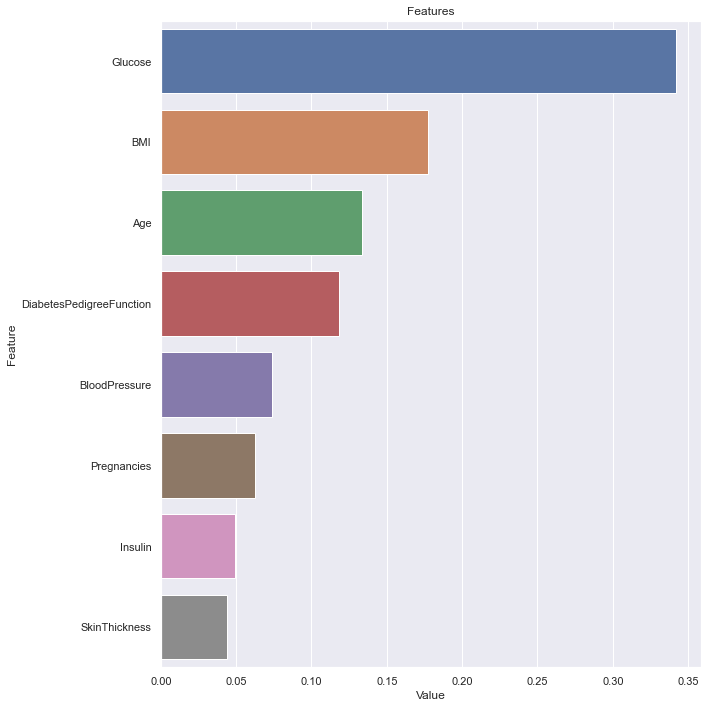

In [93]:
plot_importance(model = rf_final,
                features=X,
                save=True)

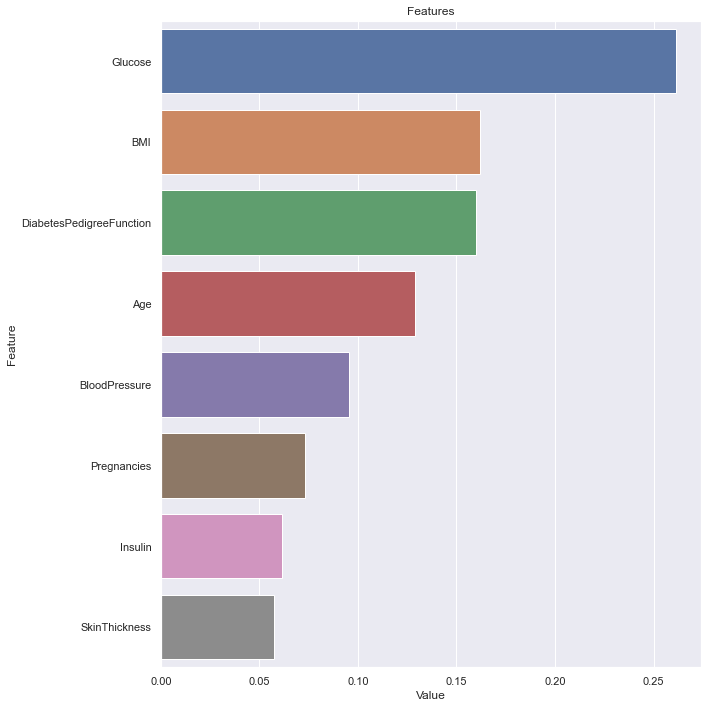

In [94]:
plot_importance(model = gbm_final,
                features=X,
                save=True)

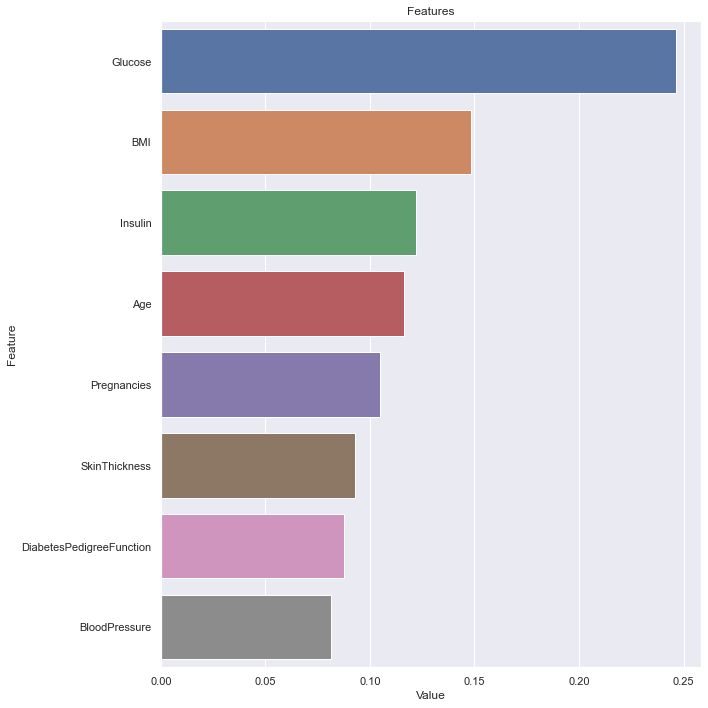

In [95]:
plot_importance(model = xgboost_final,
                features=X,
                save=True)

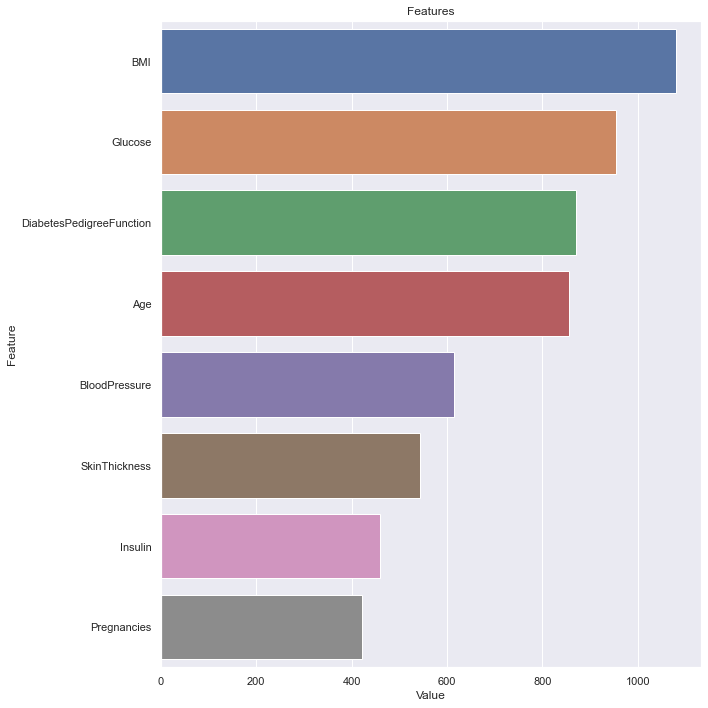

In [96]:
plot_importance(model = lgbm_final,
                features=X,
                save=True)

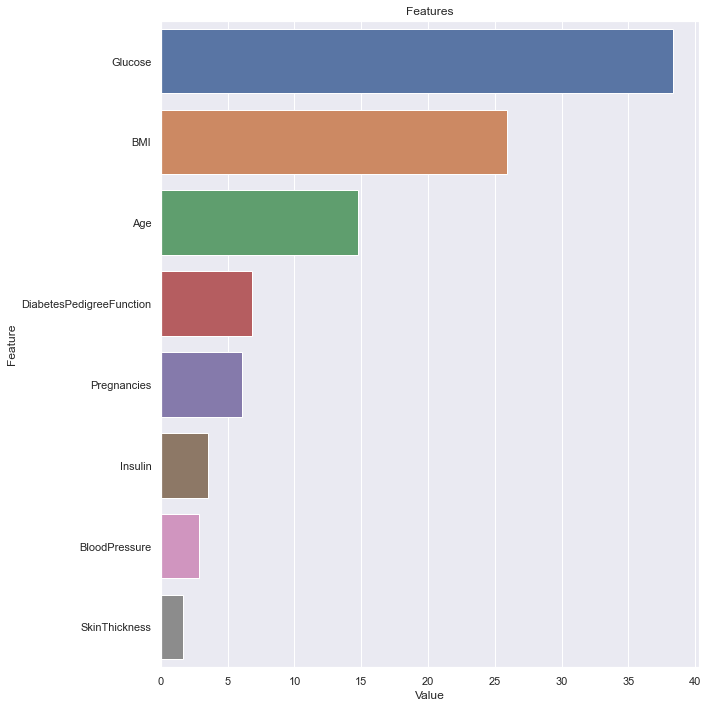

In [97]:
plot_importance(model = catboost_final,
                features=X,
                save=True)

## RandomSearchCV

 - RandomSearchCV, GridSearchCV' den daha hızlı çalışır. Bunun nedeni, geniş bir alanda random olarak arayarak, daha küçük şeye indirger. 

In [98]:
rf_model = RandomForestClassifier(random_state=17)

In [99]:
rf_random_params = {"max_depth": np.random.randint(5, 50, 10),
                    "max_features": [3, 5, 7, "auto", "sqrt"],
                    "min_samples_split": np.random.randint(2, 50, 20),
                    "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=10)]}

In [100]:
rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_random_params,
                               n_iter=100,  # Number of parameters to be tried
                               cv=3,
                               verbose=True,
                               random_state=42,
                               n_jobs=-1)

In [101]:
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=17),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([24, 48, 19, 18, 15, 17, 44,  7,  9, 32]),
                                        'max_features': [3, 5, 7, 'auto',
                                                         'sqrt'],
                                        'min_samples_split': array([13, 16, 47,  8,  4, 18,  6,  7, 12, 22, 46, 26,  6, 27, 35, 27, 46,
        9,  4,  6]),
                                        'n_estimators': [200, 344, 488, 633,
                                                         777, 922, 1066, 1211,
                                                         1355, 1500]},
                   random_state=42, verbose=True)

In [102]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 22,
 'max_features': 'sqrt',
 'max_depth': 18}

In [103]:
rf_random_final = rf_model.set_params(**rf_random.best_params_,
                                      random_state=17).fit(X,y)

In [104]:
cv_results = cross_validate(estimator=rf_random_final,
                            X=X,
                            y=y,
                            cv=5,
                            scoring=["accuracy","f1","roc_auc"])

In [105]:
cv_results['test_accuracy'].mean()

0.7696120872591461

In [106]:
cv_results['test_f1'].mean()

0.6349765689355348

In [107]:
cv_results['test_roc_auc'].mean()

0.8361747030048916

## Examining Model Complexity with Learning Curves

In [108]:
rf_val_params = [["max_depth", [5, 8, 15, 20, 30, None]],
                 ["max_features", [3, 5, 7, "auto"]],
                 ["min_samples_split", [2, 5, 8, 15, 20]],
                 ["n_estimators", [10, 50, 100, 200, 500]]]

In [109]:
rf_model = RandomForestClassifier(random_state=17)

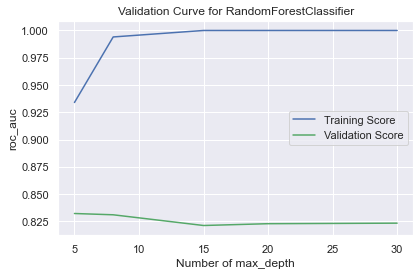

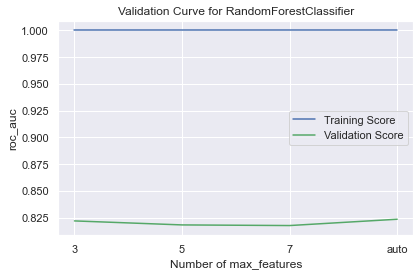

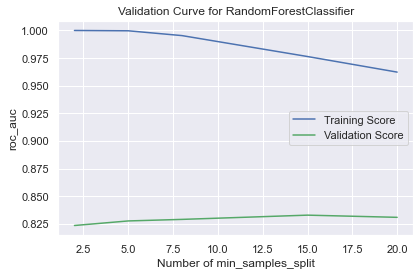

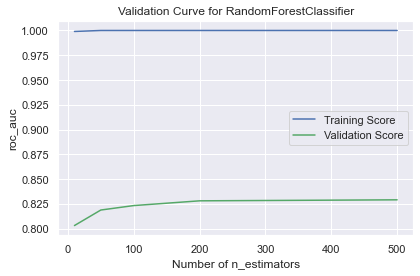

In [110]:
for i in range(len(rf_val_params)):
    val_curve_params(rf_model, X, y, rf_val_params[i][0], rf_val_params[i][1])

In [111]:
rf_val_params[0][1]

[5, 8, 15, 20, 30, None]